##### Candidate Name: Putra Bahy Helmi Hartoyo
##### Candidate Email: bahyhelmi97@gmail.com

- This notebook is written to fulfill the assesment task of PozaLabs in creating music samples from MusicVAE architecture using MIDI dataset.
- This notebook adopt the method available on the official GitHub repository of MusicVAE: https://github.com/magenta/magenta/tree/main/magenta/models/music_vae#training-your-own-musicvae

#### Import Libraries

In [43]:
# Import necessary libraries
import os
import librosa

import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from IPython.display import Audio
from midi2audio import FluidSynth

In [4]:
# Check for GPUs
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

#### Evaluation

In [89]:
# Setup Tensorboard to monitor validation metrics
%load_ext tensorboard
%tensorboard --logdir=ckpts/groove-4-bar/eval --port=6007

In [6]:
# We can utilize the GrooVAE model from magenta to eval the model checkpoint
# GrooVAE is the variant of MusicVAE which specifically designed for the drum performances in MIDI dataset
# We will take the latest checkpoint from the training directory

!CUDA_VISIBLE_DEVICES=1 python3 ./magenta/magenta/models/music_vae/music_vae_train.py \
    --config="groovae_4bar" \
    --run_dir="ckpts/groove-4-bar" \
    --mode="eval" \
    --tfds_name="groove/4bar-midionly" \
    --cache_dataset=True

/bin/bash: /home/icl1/anaconda3/envs/test/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-06-02 11:43:28.831960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 11:43:29.447662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/icl1/anaconda3/envs/test/lib/:/home/icl1/anaconda3/envs/test/lib/python3.7/site-packages/nvidia/cudnn/lib
2023-06-02 11:43:29.447888: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

#### Inference - Sample

- Given the latest checkpoint of our model (**"model.ckpt-10000.data-00000-of-00001"**), we generate new audio samples from the MusicVAE.
- Utilizing the learned latent space and model parameters, the MusicVAE is able to generate new 4-bar drum audio samples.

In [11]:
# Generate 10 audio samples
!CUDA_VISIBLE_DEVICES=1 python3 ./magenta/magenta/models/music_vae/music_vae_generate.py \
    --config="groovae_4bar" \
    --checkpoint_file="ckpts/groove-4-bar/train" \
    --mode="sample" \
    --num_outputs=10 \
    --output_dir="results/sample/groove-4-bar"

/bin/bash: /home/icl1/anaconda3/envs/test/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-06-02 14:02:41.359160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 14:02:41.955598: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/icl1/anaconda3/envs/test/lib/:/home/icl1/anaconda3/envs/test/lib/python3.7/site-packages/nvidia/cudnn/lib
2023-06-02 14:02:41.955772: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

In [62]:
# Directory of generated sample
sample_dir = "results/sample/groove-4-bar/"

# Function to play audio
def play_audio(midi_path):
    # Convert MIDI to wav
    FluidSynth().midi_to_audio(midi_path, 'output.wav')
    
    # Generate visualization
    x, sr = librosa.load('output.wav')
    plt.figure(figsize=(8, 4))
    librosa.display.waveplot(x, sr=sr)
    
    plt.title("Waveform of \n%s" % midi_path.replace(sample_dir, ""))
    plt.show()
    
    return Audio('output.wav')
    
# List of generated samples
gen_audios = [sample_dir+x for x in os.listdir(sample_dir)]
gen_audios

['results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-000-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-001-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-002-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-003-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-004-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-005-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-006-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-007-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-008-of-010.mid',
 'results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-009-of-010.mid']

fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


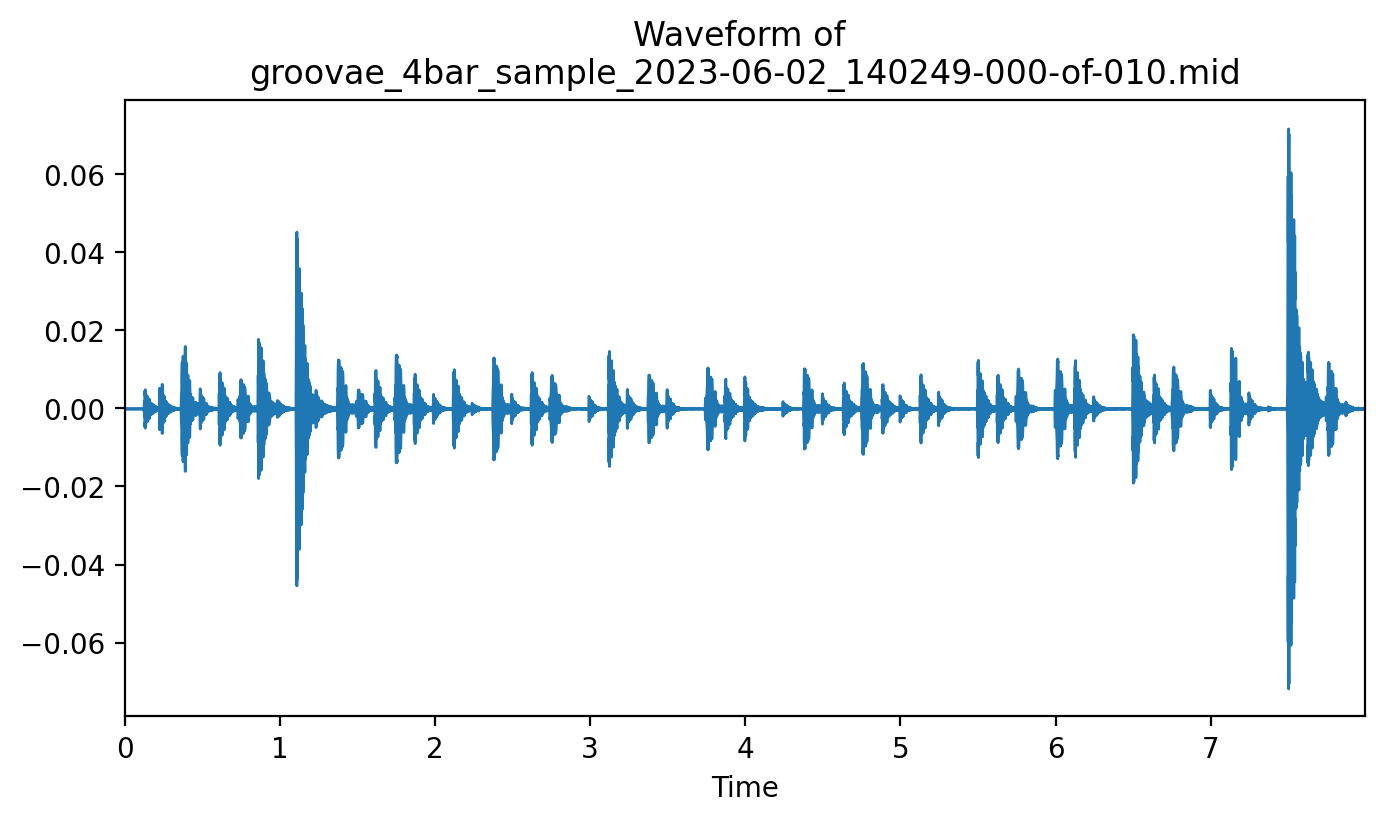

In [64]:
# Play a random audio generated sample
play_audio(gen_audios[0])

#### Inference - Interpolate (Additional)
- Interpolation means **generating new MIDI sequences** that lie between two existing MIDI sequences. 
- Interpolation techniques can be used to **smoothly transition** from one sequence to another, creating a series of MIDI sequences that exhibit a gradual transformation.

fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


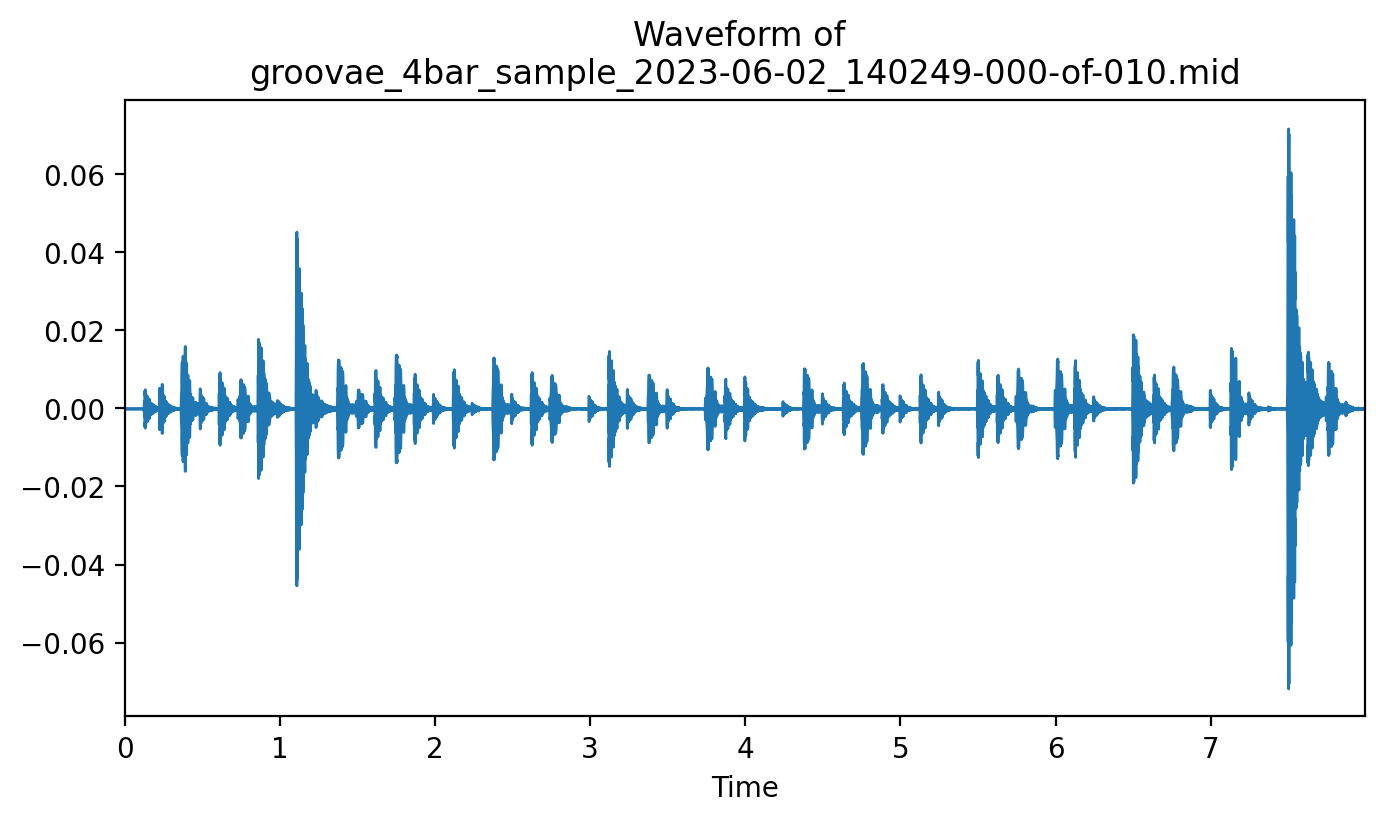

In [68]:
# Take two generated audio samples
midi_1 = gen_audios[0]
midi_2 = gen_audios[1]

play_audio(midi_1)

fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


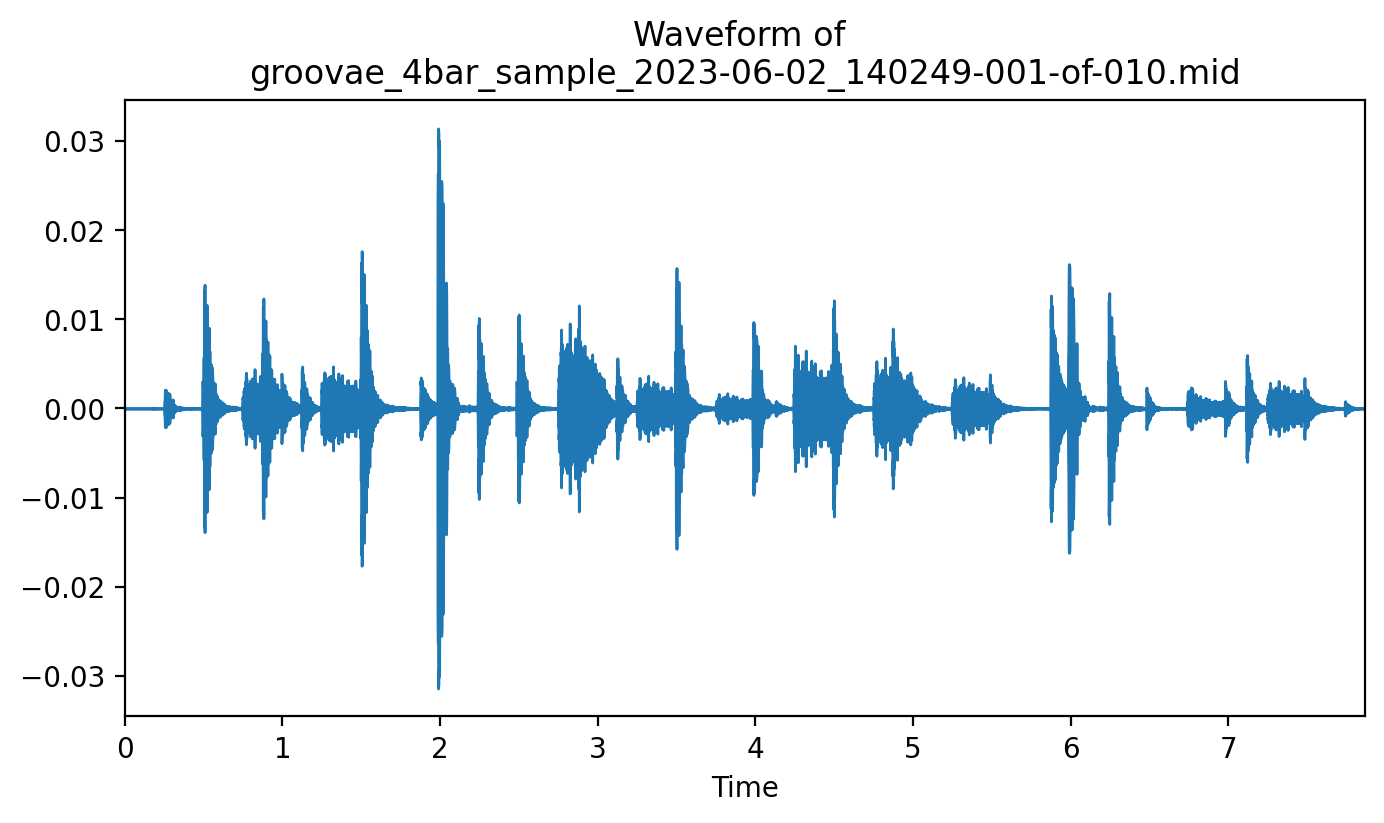

In [69]:
play_audio(midi_2)

In [71]:
print(midi_1), print(midi_2)

results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-000-of-010.mid
results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-001-of-010.mid


In [83]:
# Generate two audio samples by interpolating two previously generated audio
!CUDA_VISIBLE_DEVICES=1 python3 ./magenta/magenta/models/music_vae/music_vae_generate.py \
    --config="groovae_4bar" \
    --checkpoint_file="ckpts/groove-4-bar/train" \
    --mode="interpolate" \
    --input_midi_1="results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-000-of-010.mid" \
    --input_midi_2="results/sample/groove-4-bar/groovae_4bar_sample_2023-06-02_140249-001-of-010.mid" \
    --num_outputs=2 \
    --output_dir="results/interpolate/groove-4-bar"

/bin/bash: /home/icl1/anaconda3/envs/test/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-06-02 15:58:11.987245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 15:58:12.547266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/icl1/anaconda3/envs/test/lib/:/home/icl1/anaconda3/envs/test/lib/python3.7/site-packages/nvidia/cudnn/lib
2023-06-02 15:58:12.547442: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

In [85]:
# List of generated interpolation samples
sample_dir = "results/interpolate/groove-4-bar/"
gen_audios = [sample_dir+x for x in os.listdir(sample_dir)]
gen_audios

['results/interpolate/groove-4-bar/.ipynb_checkpoints',
 'results/interpolate/groove-4-bar/groovae_4bar_interpolate_2023-06-02_155820-000-of-002.mid',
 'results/interpolate/groove-4-bar/groovae_4bar_interpolate_2023-06-02_155820-001-of-002.mid']

fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


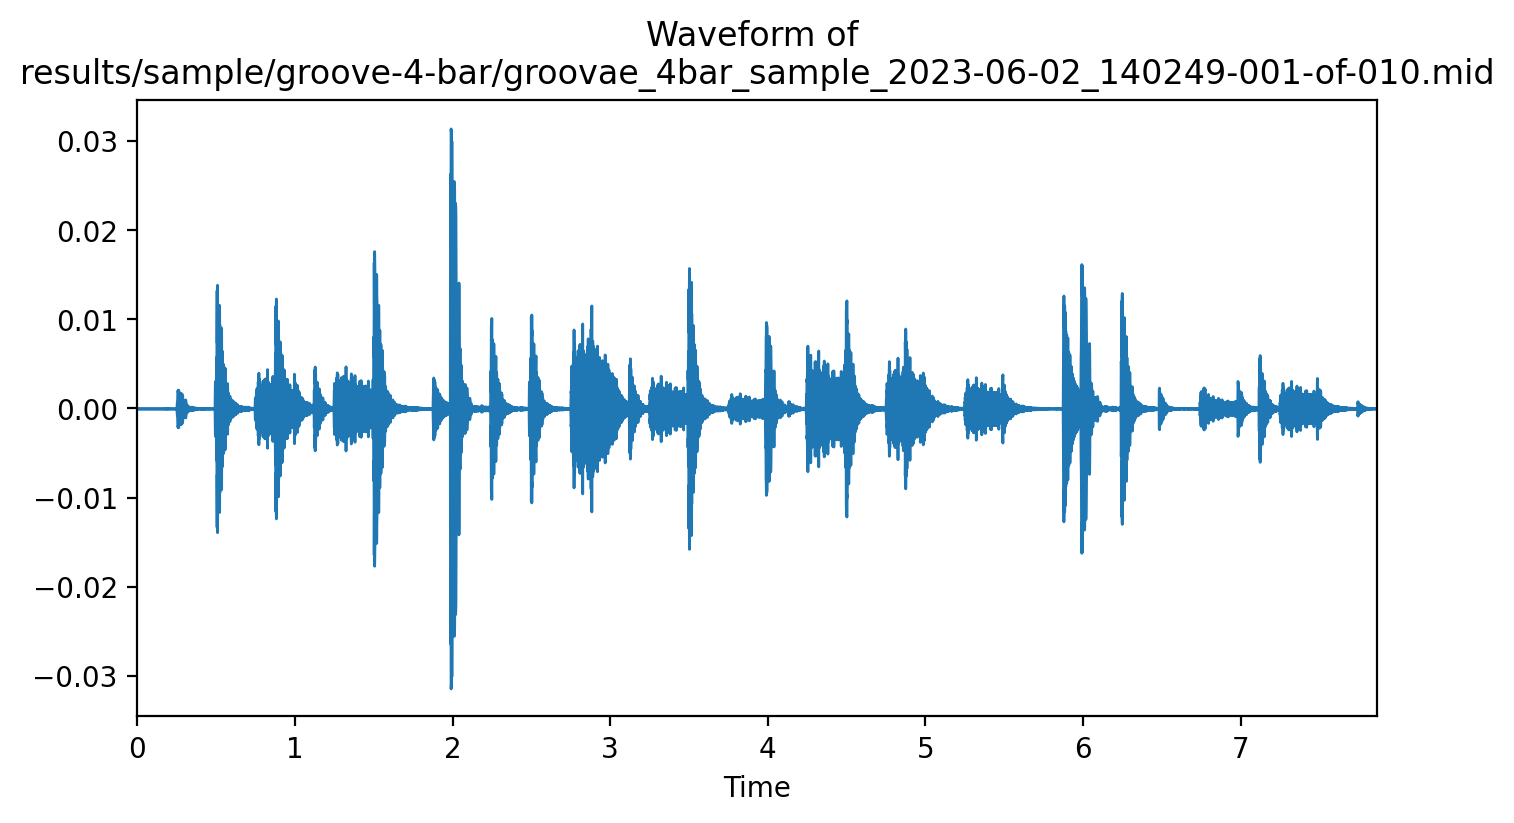

fluidsynth: panic: An error occurred while reading from stdin.
fluidsynth: panic: An error occurred while reading from stdin.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


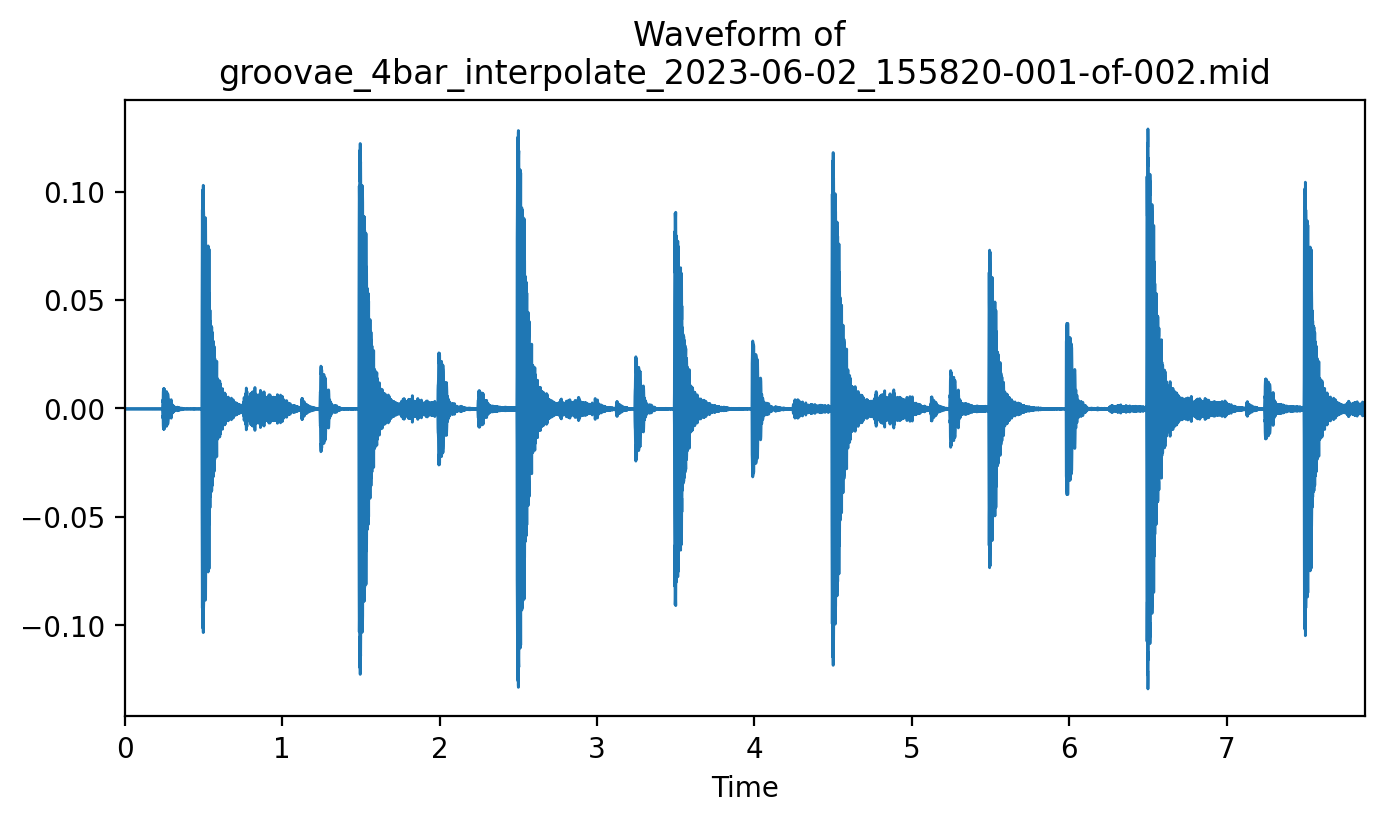

In [88]:
# Sources
play_audio(midi_1), play_audio(midi_2), 

# Interpolated
play_audio(gen_audios[2])